In [1]:
from google.colab import auth
auth.authenticate_user()
!echo "deb http://packages.cloud.google.com/apt gcsfuse-bionic main" > /etc/apt/sources.list.d/gcsfuse.list
!curl https://packages.cloud.google.com/apt/doc/apt-key.gpg | apt-key add -
!apt -qq update
!apt -qq install gcsfuse
!mkdir bucket
!gcsfuse gcommand ./bucket

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100   653  100   653    0     0  19205      0 --:--:-- --:--:-- --:--:-- 19205
OK
23 packages can be upgraded. Run 'apt list --upgradable' to see them.
The following NEW packages will be installed:
  gcsfuse
0 upgraded, 1 newly installed, 0 to remove and 23 not upgraded.
Need to get 4,278 kB of archives.
After this operation, 12.8 MB of additional disk space will be used.
Selecting previously unselected package gcsfuse.
(Reading database ... 144618 files and directories currently installed.)
Preparing to unpack .../gcsfuse_0.30.0_amd64.deb ...
Unpacking gcsfuse (0.30.0) ...
Setting up gcsfuse (0.30.0) ...
Using mount point: /content/bucket
Opening GCS connection...
Opening bucket...
Mounting file system...
File system has been successfully mounted.


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
PROJECT_PATH = '/content/drive/My Drive/Projects/Speech-Commands-Classification/'
MODELS_PATH = '/content/drive/My Drive/Projects/Speech-Commands-Classification/models/'
import sys
sys.path.append(PROJECT_PATH)
sys.path.append('/content/')

In [4]:
%load_ext autoreload
%autoreload 2

In [5]:
!unzip -qq /content/bucket/dataset.zip -d /content

In [10]:
!mkdir models

In [17]:
import torch
from torch import optim
import torch.nn as nn

import numpy as np

import matplotlib.pyplot as plt

from const import Consts
from data_handling.loaders import get_data_loaders
from model import LeNet, weight_init
from train import train, evaluation, test_model, train_lenet, test
from utils import plot_loss

In [8]:
if torch.cuda.is_available():
  device = torch.device('cuda')
else:
  device = torch.device('cpu')

  0%|          | 0/1326 [00:00<?, ?commands/s]

train loss in epoch 1 is: 2.945905229804383
validation loss in epoch 1 is: 1.8646036615738502
validation accuracy in epoch 1 is: 0.48391944694920347


  0%|          | 0/1326 [00:00<?, ?commands/s]

train loss in epoch 2 is: 2.0842384389442916
validation loss in epoch 2 is: 1.206138857282125
validation accuracy in epoch 2 is: 0.6710750425809037


  0%|          | 0/1326 [00:00<?, ?commands/s]

train loss in epoch 3 is: 1.626901625193442
validation loss in epoch 3 is: 0.8921100921355761
validation accuracy in epoch 3 is: 0.7536319006111613


  0%|          | 0/1326 [00:00<?, ?commands/s]

train loss in epoch 4 is: 1.3026172269253709
validation loss in epoch 4 is: 0.7543261204010401
validation accuracy in epoch 4 is: 0.7912032862438634


  0%|          | 0/1326 [00:00<?, ?commands/s]

train loss in epoch 5 is: 1.053112590205076
validation loss in epoch 5 is: 0.6075254076948533
validation accuracy in epoch 5 is: 0.8238653441538923


  0%|          | 0/1326 [00:00<?, ?commands/s]

train loss in epoch 6 is: 0.856688330211251
validation loss in epoch 6 is: 0.5336360020133165
validation accuracy in epoch 6 is: 0.843602845406272


  0%|          | 0/1326 [00:00<?, ?commands/s]

train loss in epoch 7 is: 0.6977122292529404
validation loss in epoch 7 is: 0.47862356872512746
validation accuracy in epoch 7 is: 0.8598336839995993


  0%|          | 0/1326 [00:00<?, ?commands/s]

train loss in epoch 8 is: 0.5791218374289718
validation loss in epoch 8 is: 0.4415404553978871
validation accuracy in epoch 8 is: 0.8727582406572487


  0%|          | 0/1326 [00:00<?, ?commands/s]

train loss in epoch 9 is: 0.4786524055455425
validation loss in epoch 9 is: 0.42787666809864533
validation accuracy in epoch 9 is: 0.8745616671676185


  0%|          | 0/1326 [00:00<?, ?commands/s]

train loss in epoch 10 is: 0.3958432519384189
validation loss in epoch 10 is: 0.40956333976907605
validation accuracy in epoch 10 is: 0.8837791804428414


  0%|          | 0/1326 [00:00<?, ?commands/s]

train loss in epoch 11 is: 0.32656287061132006
validation loss in epoch 11 is: 0.4117419997182412
validation accuracy in epoch 11 is: 0.8860835587616471


  0%|          | 0/1326 [00:00<?, ?commands/s]

train loss in epoch 12 is: 0.2741675376639242
validation loss in epoch 12 is: 0.4201978191924401
validation accuracy in epoch 12 is: 0.8858831780382728


100%|██████████| 1326/1326 [02:10<00:00, 10.15commands/s]


train loss in epoch 13 is: 0.23075297509697948
validation loss in epoch 13 is: 0.41345556166309577
validation accuracy in epoch 13 is: 0.8901913635908225


  0%|          | 0/1326 [00:00<?, ?commands/s]

train loss in epoch 14 is: 0.19801374128703617
validation loss in epoch 14 is: 0.4192596861662773
validation accuracy in epoch 14 is: 0.8894900310590121


100%|██████████| 1326/1326 [02:10<00:00, 10.15commands/s]


train loss in epoch 15 is: 0.17611486973524723
validation loss in epoch 15 is: 0.41057354913881194
validation accuracy in epoch 15 is: 0.8925959322713155
test accuracy is: 0.8668786915038619


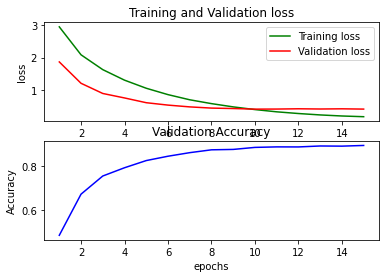

In [16]:
train_lenet(device, '/content/dataset/')

In [24]:
test(device, '/content/dataset/test/', '/content/models/epoch-15.pth')
test(device, '/content/dataset/valid/', '/content/models/epoch-15.pth')
test(device, '/content/dataset/train/', '/content/models/epoch-15.pth')

test accuracy is: 0.8771467514766016
test accuracy is: 0.8925959322713155
test accuracy is: 0.9959100927595677
